### Cleaned Data

### Pesticide VS Crop Yield For A Specific Country
Note: Run and Enter a  country name (E.g. Malaysia) to see the graph 

Enter the name of the country to display the graph:  Malaysia


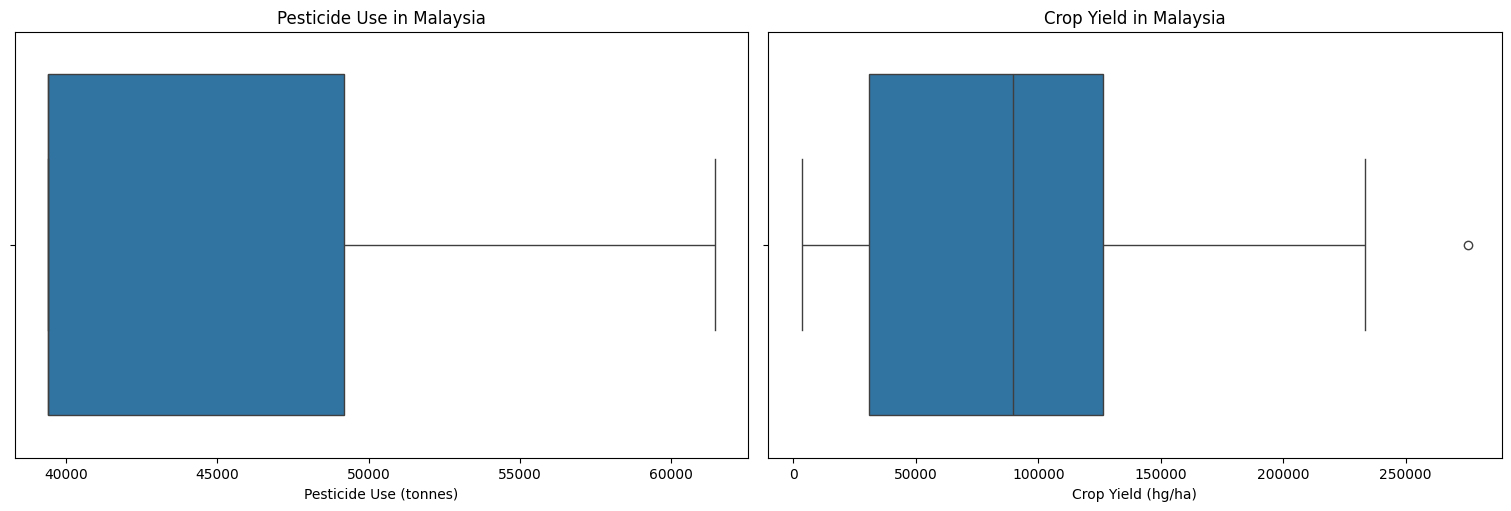

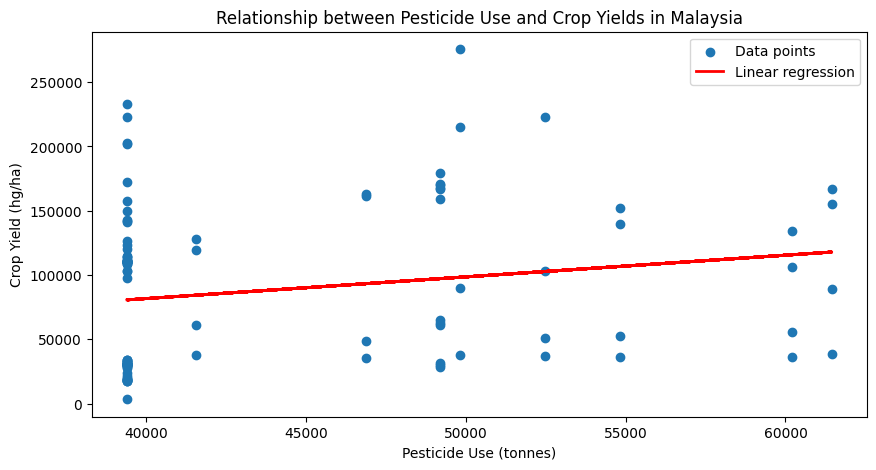

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to plot the graph for a specific area in pesticide dataset
def plot_pesticide_data(area_name, data):
    if area_name not in data['Area'].unique():
        print(f"Area '{area_name}' not found in the dataset.")
        return
    
    area_data = data[data['Area'] == area_name]
    
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
    
    # Boxplot for Pesticide Use
    sns.boxplot(ax=axes[0], x=area_data['Pesticide Use (tonnes)'])
    axes[0].set_title(f'Pesticide Use in {area_name}')
    axes[0].set_xlabel('Pesticide Use (tonnes)')
    
    # Boxplot for Crop Yield
    sns.boxplot(ax=axes[1], x=area_data['Crop Yield (hg/ha)'])
    axes[1].set_title(f'Crop Yield in {area_name}')
    axes[1].set_xlabel('Crop Yield (hg/ha)')
    
    # Scatter plot for the relationship between pesticide use and crop yields
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(area_data['Pesticide Use (tonnes)'], area_data['Crop Yield (hg/ha)'], label='Data points')
    ax.set_title(f'Relationship between Pesticide Use and Crop Yields in {area_name}')
    ax.set_xlabel('Pesticide Use (tonnes)')
    ax.set_ylabel('Crop Yield (hg/ha)')
    
    # Linear regression
    X = area_data['Pesticide Use (tonnes)'].values.reshape(-1, 1)
    Y = area_data['Crop Yield (hg/ha)'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    Y_pred = reg.predict(X)
    
    ax.plot(X, Y_pred, color='red', linewidth=2, label='Linear regression')
    ax.legend()
    
    plt.show()

# Load the dataset
data = pd.read_csv('cleaned_pesticide_data.csv')

# Prompt the user to enter an area name
area_name = input("Enter the name of the country to display the graph: ")
plot_pesticide_data(area_name, data)


### Fertiliser VS Crop Yield For A Specific Country
Note: Run and Enter a  country name (E.g. Malaysia) to see the graph 

Enter the name of the country to display the graph:  Malaysia


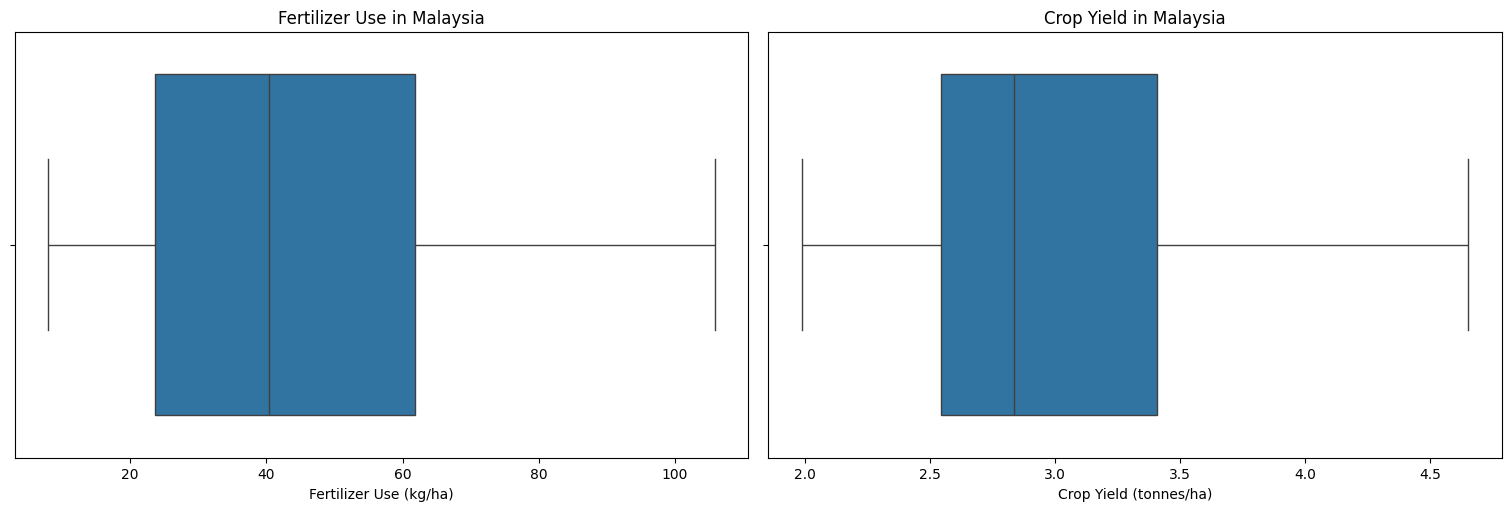

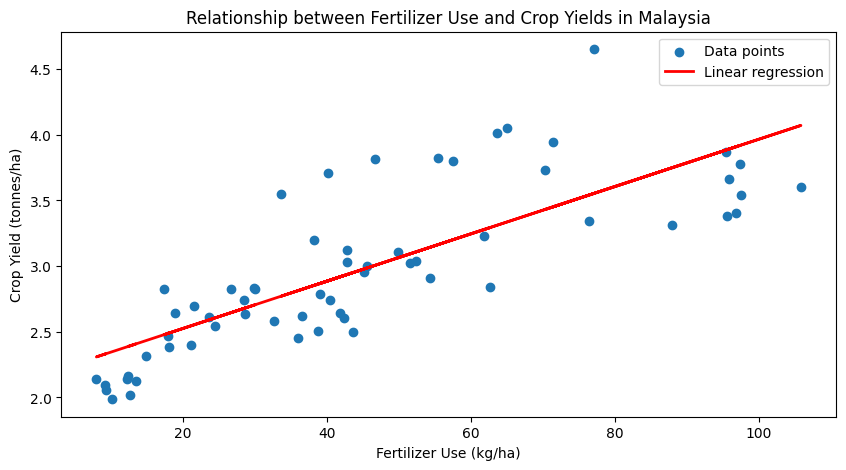

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to plot the graph for a specific country in fertilizer dataset
def plot_fertilizer_data(country_name, data):
    if country_name not in data['Country'].unique():
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_data = data[data['Country'] == country_name]
    
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
    
    # Boxplot for Fertilizer Use
    sns.boxplot(ax=axes[0], x=country_data['Nitrogen Fertilizer Use (kg/ha)'])
    axes[0].set_title(f'Fertilizer Use in {country_name}')
    axes[0].set_xlabel('Fertilizer Use (kg/ha)')
    
    # Boxplot for Crop Yield
    sns.boxplot(ax=axes[1], x=country_data['Cereal Yield (tonnes/ha)'])
    axes[1].set_title(f'Crop Yield in {country_name}')
    axes[1].set_xlabel('Crop Yield (tonnes/ha)')
    
    # Scatter plot for the relationship between fertilizer use and crop yields
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(country_data['Nitrogen Fertilizer Use (kg/ha)'], country_data['Cereal Yield (tonnes/ha)'], label='Data points')
    ax.set_title(f'Relationship between Fertilizer Use and Crop Yields in {country_name}')
    ax.set_xlabel('Fertilizer Use (kg/ha)')
    ax.set_ylabel('Crop Yield (tonnes/ha)')
    
    # Linear regression
    X = country_data['Nitrogen Fertilizer Use (kg/ha)'].values.reshape(-1, 1)
    Y = country_data['Cereal Yield (tonnes/ha)'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    Y_pred = reg.predict(X)
    
    ax.plot(X, Y_pred, color='red', linewidth=2, label='Linear regression')
    ax.legend()
    
    plt.show()

# Load the dataset
data = pd.read_csv('cleaned_fertilizer_data.csv')

# Prompt the user to enter a country name
country_name = input("Enter the name of the country to display the graph: ")
plot_fertilizer_data(country_name, data)


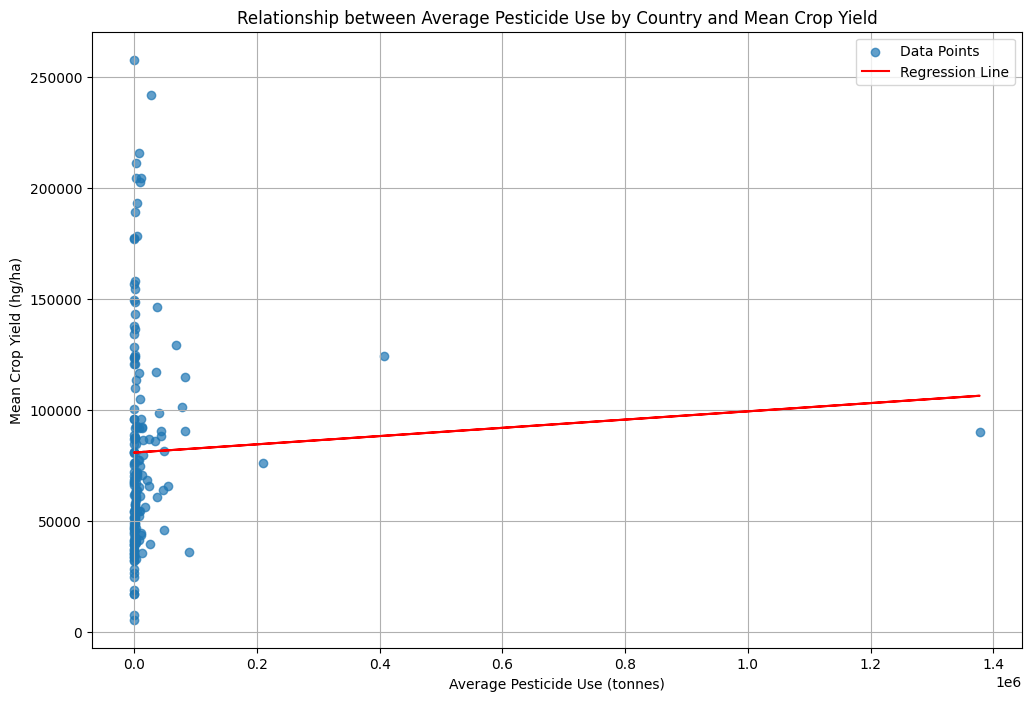

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
fertilizer_data = pd.read_csv('cleaned_pesticide_data.csv')

# Calculate mean values for each country
def calculate_mean_values(data):
    countries = data['Area'].unique()
    mean_values = []
    for country in countries:
        country_data = data[data['Area'] == country]
       
        mean_pesticide_use = country_data['Pesticide Use (tonnes)'].mean()
        mean_crop_yield = country_data['Crop Yield (hg/ha)'].mean()
        mean_values.append({
            'Country': country,
            'Mean Pesticide Use (tonnes)': mean_pesticide_use,
            'Mean Crop Yield (hg/ha)': mean_crop_yield
        })
    mean_data = pd.DataFrame(mean_values)
    return mean_data

mean_fertilizer_data = calculate_mean_values(fertilizer_data)

# Fit linear regression
X = mean_fertilizer_data[['Mean Pesticide Use (tonnes)']]
y = mean_fertilizer_data['Mean Crop Yield (hg/ha)']
model = LinearRegression()
model.fit(X, y)
regression_line = model.predict(X)

# Function to plot the graph with linear regression line
def plot_average(data, regression_line):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.scatter(data['Mean Pesticide Use (tonnes)'], data['Mean Crop Yield (hg/ha)'], alpha=0.7, label='Data Points')
    
    # Regression line
    plt.plot(data['Mean Pesticide Use (tonnes)'], regression_line, color='red', label='Regression Line')
    
    plt.title('Relationship between Average Pesticide Use by Country and Mean Crop Yield')
    plt.xlabel('Average Pesticide Use (tonnes)')
    plt.ylabel('Mean Crop Yield (hg/ha)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph 
plot_average(mean_fertilizer_data, regression_line)


### Relationship between Average Pesticide Use by Country and Mean Crop Yield ( with Outliers)

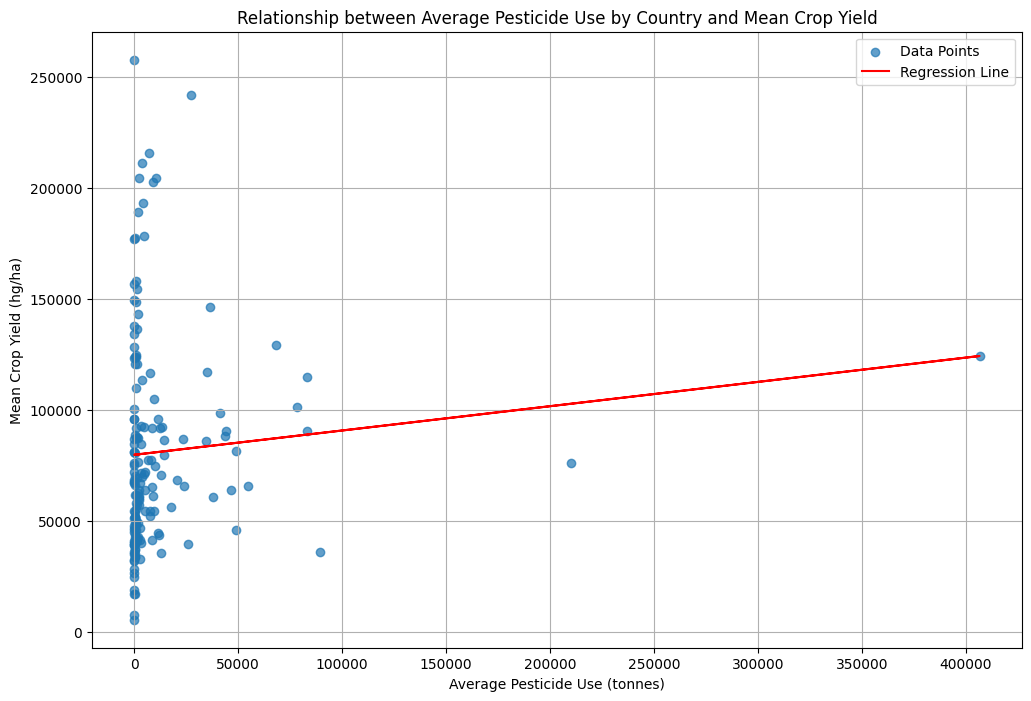

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
fertilizer_data = pd.read_csv('cleaned_pesticide_data.csv')

# Calculate mean values for each country
def calculate_mean_values(data):
    countries = data['Area'].unique()
    mean_values = []
    for country in countries:
        country_data = data[data['Area'] == country]
       
        mean_pesticide_use = country_data['Pesticide Use (tonnes)'].mean()
        mean_crop_yield = country_data['Crop Yield (hg/ha)'].mean()
        mean_values.append({
            'Country': country,
            'Mean Pesticide Use (tonnes)': mean_pesticide_use,
            'Mean Crop Yield (hg/ha)': mean_crop_yield
        })
    mean_data = pd.DataFrame(mean_values)
    return mean_data

mean_fertilizer_data = calculate_mean_values(fertilizer_data)

# Filter out extreme outliers
mean_fertilizer_data = mean_fertilizer_data[mean_fertilizer_data['Mean Pesticide Use (tonnes)'] < 1e6]

# Fit linear regression
X = mean_fertilizer_data[['Mean Pesticide Use (tonnes)']]
y = mean_fertilizer_data['Mean Crop Yield (hg/ha)']
model = LinearRegression()
model.fit(X, y)
regression_line = model.predict(X)

# Function to plot the graph with linear regression line
def plot_average(data, regression_line):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.scatter(data['Mean Pesticide Use (tonnes)'], data['Mean Crop Yield (hg/ha)'], alpha=0.7, label='Data Points')
    
    # Regression line
    plt.plot(data['Mean Pesticide Use (tonnes)'], regression_line, color='red', label='Regression Line')
    
    plt.title('Relationship between Average Pesticide Use by Country and Mean Crop Yield')
    plt.xlabel('Average Pesticide Use (tonnes)')
    plt.ylabel('Mean Crop Yield (hg/ha)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph 
plot_average(mean_fertilizer_data, regression_line)


### Relationship between Average Pesticide Use by Country and Mean Crop Yield (cleaned)

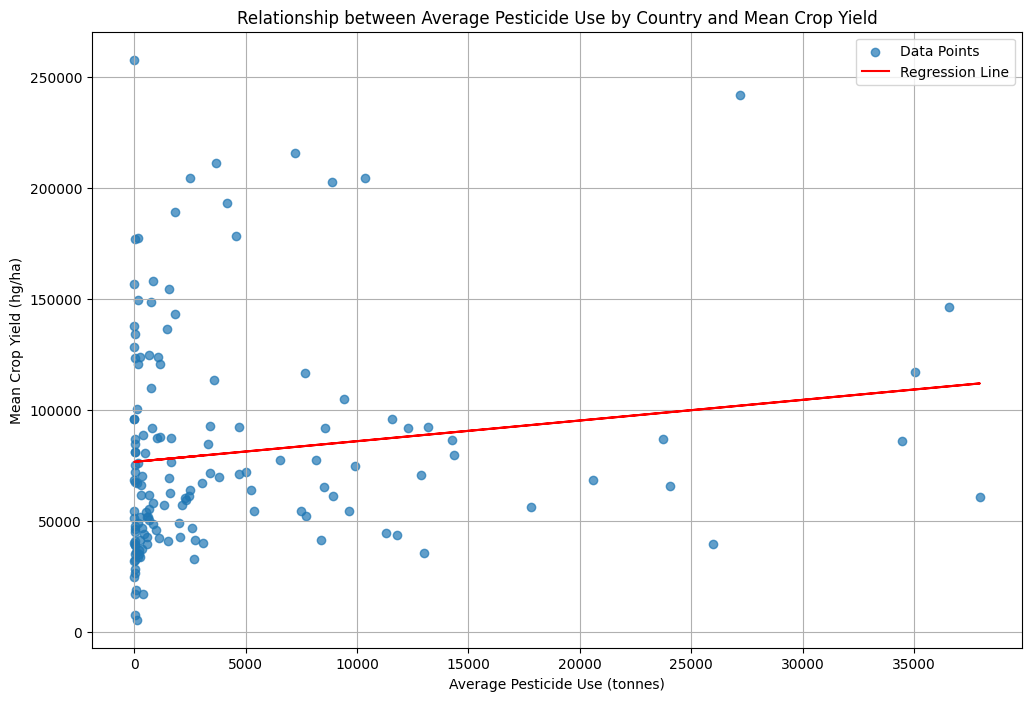

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
fertilizer_data = pd.read_csv('cleaned_pesticide_data.csv')

# Calculate mean values for each country
def calculate_mean_values(data):
    countries = data['Area'].unique()
    mean_values = []
    for country in countries:
        country_data = data[data['Area'] == country]
       
        mean_pesticide_use = country_data['Pesticide Use (tonnes)'].mean()
        mean_crop_yield = country_data['Crop Yield (hg/ha)'].mean()
        mean_values.append({
            'Country': country,
            'Mean Pesticide Use (tonnes)': mean_pesticide_use,
            'Mean Crop Yield (hg/ha)': mean_crop_yield
        })
    mean_data = pd.DataFrame(mean_values)
    return mean_data

mean_fertilizer_data = calculate_mean_values(fertilizer_data)

# Further filter out extreme outliers
mean_fertilizer_data = mean_fertilizer_data[mean_fertilizer_data['Mean Pesticide Use (tonnes)'] < 40000]

# Fit linear regression
X = mean_fertilizer_data[['Mean Pesticide Use (tonnes)']]
y = mean_fertilizer_data['Mean Crop Yield (hg/ha)']
model = LinearRegression()
model.fit(X, y)
regression_line = model.predict(X)

# Function to plot the graph with linear regression line
def plot_average(data, regression_line):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.scatter(data['Mean Pesticide Use (tonnes)'], data['Mean Crop Yield (hg/ha)'], alpha=0.7, label='Data Points')
    
    # Regression line
    plt.plot(data['Mean Pesticide Use (tonnes)'], regression_line, color='red', label='Regression Line')
    
    plt.title('Relationship between Average Pesticide Use by Country and Mean Crop Yield')
    plt.xlabel('Average Pesticide Use (tonnes)')
    plt.ylabel('Mean Crop Yield (hg/ha)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph 
plot_average(mean_fertilizer_data, regression_line)


### Relationship between Average Nitrogen Use by Country and Mean Crop Yields for All Countries

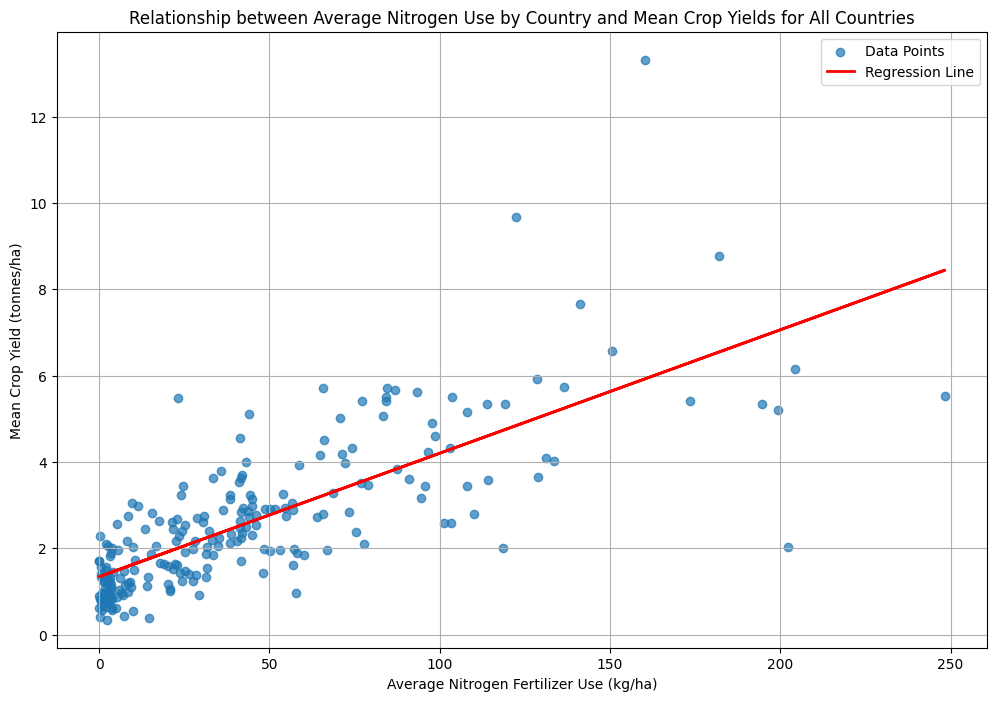

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the datasets
fertilizer_data = pd.read_csv('cleaned_fertilizer_data.csv')

# Calculate mean values for each country 
def calculate_mean_values(data):
    countries = data['Country'].unique()
    mean_values = []
    for country in countries:
        country_data = data[data['Country'] == country]
       
        mean_fertilizer_use = country_data['Nitrogen Fertilizer Use (kg/ha)'].mean()
        mean_crop_yield = country_data['Cereal Yield (tonnes/ha)'].mean()
        mean_values.append({
            'Country': country,
            'Mean Fertilizer Use (tonnes)': mean_fertilizer_use,
            'Mean Crop Yield (tonnes/ha)': mean_crop_yield
        })
    mean_data = pd.DataFrame(mean_values)
    return mean_data

mean_fertilizer_data = calculate_mean_values(fertilizer_data)

# Perform linear regression
X = mean_fertilizer_data[['Mean Fertilizer Use (tonnes)']]
y = mean_fertilizer_data['Mean Crop Yield (tonnes/ha)']

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Predictions for the regression line
y_pred = linear_regressor.predict(X)

# Function to plot the graph 
def plot_average(data, predictions):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot 
    plt.scatter(data['Mean Fertilizer Use (tonnes)'], data['Mean Crop Yield (tonnes/ha)'], alpha=0.7, label='Data Points')
    
    # Regression line
    plt.plot(data['Mean Fertilizer Use (tonnes)'], predictions, color='red', linewidth=2, label='Regression Line')
    
    # Adding labels for each country
    #for i, row in data.iterrows():
        #plt.text(row['Mean Fertilizer Use (tonnes)'], row['Mean Crop Yield (tonnes/ha)'], row['Country'], fontsize=9)
    
    plt.title('Relationship between Average Nitrogen Use by Country and Mean Crop Yields for All Countries')
    plt.xlabel('Average Nitrogen Fertilizer Use (kg/ha)')
    plt.ylabel('Mean Crop Yield (tonnes/ha)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the graph
plot_average(mean_fertilizer_data, y_pred)
